<a href="https://colab.research.google.com/github/SiweiLuo/DL_with_Python/blob/master/linear_algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

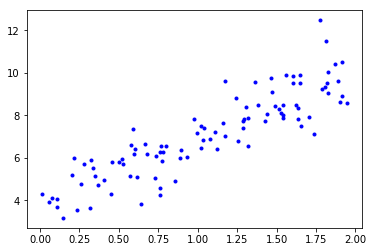

In [4]:
import numpy as np 
import matplotlib.pyplot as plt 


X = 2*np.random.rand(100,1)
y = 4+3*X+np.random.randn(100,1)

plt.plot(X,y,"b.")
plt.show()


In [0]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
theta_best

array([[3.82743126],
       [3.09979144]])

In [7]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.82743126],
       [10.02701414]])

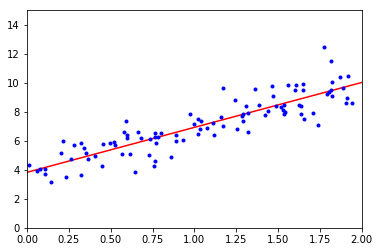

In [8]:
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()


In [10]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_







(array([3.82743126]), array([[3.09979144]]))

In [11]:
lin_reg.predict(X_new)

array([[ 3.82743126],
       [10.02701414]])

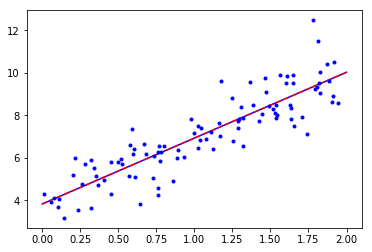

In [16]:

y_lin_reg = lin_reg.predict(X_new)

plt.plot(X_new,y_lin_reg,"b-")
plt.plot(X_new,y_predict,"r--")
plt.plot(X,y,"b.")
plt.show()


In [17]:
eta = 0.1
n_iterations = 1000
m = 100 

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
  gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
  theta = theta - eta*gradients 
  
  
theta 





array([[3.82743126],
       [3.09979144]])

In [20]:
n_epochs = 50 
t0, t1 = 5,50

def learning_schedule(t):
  return t0/(t+t1)

theta = np.random.randn(2,1)


for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2*xi.T.dot(xi.dot(theta)-yi)
    eta = learning_schedule(epoch*m+i)
    theta = theta-eta*gradients
  
  
theta
  
 

array([[3.76883507],
       [3.10416891]])

In [0]:
y

In [32]:
y.ravel()

array([ 5.51311658,  5.73139515,  9.34092669,  7.89513233,  9.07767805,
        4.29728516,  6.57159878,  7.75261637,  6.10782757,  5.81267956,
        9.23633277,  7.18213121,  9.50777806,  8.92801951,  7.23788425,
        5.14987305,  8.48819751,  7.50342358,  6.16109577,  4.90943667,
       10.41486017,  7.51591773,  5.7027048 ,  5.05637644,  5.94123738,
        8.30181896,  9.91582617,  6.03813035,  7.88159454,  6.83996504,
        7.00453239,  7.90600806,  8.01134384,  8.47526378,  6.81019088,
        9.86677965,  3.17109004,  7.38627263,  8.12653745,  4.96723883,
        9.87748395,  5.12131507,  5.09667815,  9.56587521,  6.54995459,
        4.07343193,  6.17541775,  6.26833081,  3.83702501,  9.06185932,
        7.38099395,  3.52649009,  4.0849776 ,  6.46471276,  6.63441765,
        3.90459199,  6.28812058,  9.5370249 ,  8.37038665,  6.42656128,
        7.82065515,  6.57878703,  3.68862812,  9.62764387,  5.98376412,
        7.33595178,  6.41397915,  5.18996021,  9.6242995 ,  5.85

In [29]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter=50,penalty=None,eta0=0.1)
sgd_reg.fit(X,y.ravel())




/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=50, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [30]:
sgd_reg.intercept_,sgd_reg.coef_

(array([3.85447886]), array([3.12560469]))